# Comparing SUR and ANN

#SUR

In [ ]:
import pandas as pd
from linearmodels.system import SUR
import statsmodels.api as sm
import numpy as np


df=pd.read_csv('xfood_test.csv')
print(df.columns)
df=df[['wFood1','wFood2','wFood3','wFood4','pFood1','pFood2','pFood3','pFood4','xFood']]
df['StonePriceIndex']= np.log(df['xFood']) - np.log((df['wFood1']*df['pFood1'])+ (df['wFood2']*df['pFood2'])+(df['wFood3']*df['pFood3'])+(df['wFood4']*df['pFood4']))


# df=df[['TotalCatch_1','TotalCatch_2','TotalCatch_3','TotalCatch_4','stoneQuantityIndex','BudgetS_1','BudgetS_2','BudgetS_3','BudgetS_4']]
df['pFood1']= np.log(df['pFood1'])
df['pFood2']= np.log(df['pFood2'])
df['pFood3']= np.log(df['pFood3'])
df['pFood4']= np.log(df['pFood4'])
df
data=df.copy()

# Input variables (total catch 1 to 4 and stoneindex)
X = data[['pFood1','pFood2','pFood3','pFood4','StonePriceIndex']]

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Output variables (budget 1 to budget 4)
y1 = data['wFood1']
y2 = data['wFood2']
y3 = data['wFood3']
y4 = data['wFood4']

# Combine data into a DataFrame
data_dict = pd.concat([X, data['wFood1'], data['wFood2'], data['wFood3'], data['wFood4']], axis=1)

# Construct the system of equations
equations = {
    'wFood1': 'wFood1 ~ pFood1 + pFood2 + pFood3 + pFood4 + StonePriceIndex + const',
    'wFood2': 'wFood2 ~ pFood1 + pFood2 + pFood3 + pFood4 + StonePriceIndex + const',
    'wFood3': 'wFood3 ~ pFood1 + pFood2 + pFood3 + pFood4 + StonePriceIndex + const',
    'wFood4': 'wFood4 ~ pFood1 + pFood2 + pFood3 + pFood4 + StonePriceIndex + const'
}

# Fit the SUR model
sys = SUR.from_formula(equations, data=data_dict)
sur_res = sys.fit()

# Print the summary for the model
print(sur_res.summary)
sur_rsq_list=[]
sur_adj_rsq_list=[]
# To display the R^2 for each equation
for equation in sur_res.equations:
    print(f"\nR^2 for {equation}: {sur_res.equations[equation].rsquared:.4f}")
    sur_rsq_list.append(sur_res.equations[equation].rsquared)
    sur_adj_rsq_list.append(sur_res.equations[equation].rsquared_adj)
# Print the coefficients including intercepts for each equation
for equation in sur_res.equations:
    print(f"\nCoefficients for {equation}:")
    print(sur_res.equations[equation].params)

Index(['Unnamed: 0', 'xAgg1', 'xAgg2', 'xAgg3', 'xAgg4', 'xAgg5', 'xAgg6',
       'xAgg7', 'xAgg8', 'xAgg9', 'xAgg10', 'xAgg11', 'xAgg', 'xcAgg1',
       'xcAgg2', 'xcAgg3', 'xcAgg4', 'xcAgg5', 'xcAgg6', 'xcAgg7', 'xcAgg8',
       'xcAgg9', 'xcAgg10', 'xcAgg11', 'xcAgg', 'pAgg1', 'pAgg2', 'pAgg3',
       'pAgg4', 'pAgg5', 'pAgg6', 'pAgg7', 'pAgg8', 'pAgg9', 'pAgg10',
       'pAgg11', 'population3', 'wAgg1', 'wAgg2', 'wAgg3', 'wAgg4', 'wAgg5',
       'wAgg6', 'wAgg7', 'wAgg8', 'wAgg9', 'wAgg10', 'wAgg11', 'xFoodUsdoc',
       'xFoodUsda', 'xFoodNew', 'pMeat1', 'pMeat2', 'pMeat3', 'pMeat4',
       'cMeat1', 'cMeat2', 'cMeat3', 'cMeat4', 'xMeat1', 'xMeat2', 'xMeat3',
       'xMeat4', 'xMeat', 'pMeat', 'pMeatNew', 'xFood1', 'xFood2', 'xFood3',
       'xFood4', 'xFood', 'xcFood1', 'xcFood2', 'xcFood3', 'xcFood4', 'xcFood',
       'pFood1', 'pFood2', 'pFood3', 'pFood4', 'population12', 'wFood1',
       'wFood2', 'wFood3', 'wFood4'],
      dtype='object')
                           System GLS

In [ ]:
report_df=pd.DataFrame(columns=['Model_name','RSquared','Adj_RSquared'])
print(report_df)
def get_report(report_df,rsq,ad_rsq,model_name):
    temp_df=pd.DataFrame({'Model_name':model_name,'RSquared':[rsq],'Adj_RSquared':[ad_rsq]})
    report_df=pd.concat((report_df,temp_df),axis=0)
    return report_df
report_df

Empty DataFrame
Columns: [Model_name, RSquared, Adj_RSquared]
Index: []


,Model_name,RSquared,Adj_RSquared


In [ ]:
report_df=get_report(report_df,np.mean(list(sur_rsq_list)),np.mean(list(sur_adj_rsq_list)),'Full SUR Model')
report_df

C:\Users\agarw\AppData\Local\Temp\ipykernel_21784\3551263925.py:5: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Model_name,RSquared,Adj_RSquared
0,Full SUR Model,0.740344,0.690411


#ANN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os


df=pd.read_csv('xfood_test.csv')
df_stone=df.copy()
df_stone=df_stone[['wFood1','wFood2','wFood3','wFood4','pFood1','pFood2','pFood3','pFood4','xFood']]
df_stone['StonePriceIndex']= np.log(df_stone['xFood']) - np.log((df_stone['wFood1']*df_stone['pFood1'])+ (df_stone['wFood2']*df_stone['pFood2'])+(df_stone['wFood3']*df_stone['pFood3'])+(df_stone['wFood4']*df_stone['pFood4']))
df_stone


df1=df_stone.copy()
df1

df1['pFood1']= np.log(df1['pFood1'])
df1['pFood2']= np.log(df1['pFood2'])
df1['pFood3']= np.log(df1['pFood3'])
df1['pFood4']= np.log(df1['pFood4'])
df1

df1.columns

# Define input and output columns
input_cols = ['pFood1' , 'pFood2' , 'pFood3','pFood4','StonePriceIndex']
output_cols = ['wFood1' , 'wFood2' , 'wFood3' , 'wFood4']

# Split the data into input and output
X = df1[input_cols].values
Y = df1[output_cols].values

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(25, 5) (7, 5) (25, 4) (7, 4)


In [ ]:
# Define the model architecture
model = Sequential([
    Dense(5, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(4)  # Output layer with 4 units for BudgetS_1 to BudgetS_4
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


C:\Users\agarw\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354 (1.38 KB)

 Trainable params: 354 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=5, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0700 - val_loss: 0.0676
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0674 - val_loss: 0.0652
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0647 - val_loss: 0.0629
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0627 - val_loss: 0.0606
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0604 - val_loss: 0.0583
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0582 - val_loss: 0.0562
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0561 - val_loss: 0.0540
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0538 - val_loss: 0.0520
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0517 - val_loss: 0.0500
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0497 - val_loss: 0.0481
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0479 - val_loss: 0.0463
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0463 - val_loss: 0.0445
E

In [ ]:
X_test.shape

(7, 5)

In [ ]:
X_test

array([[4.29456061, 4.24849524, 4.30135873, 4.25703014, 1.65679544],
       [4.46129982, 4.47049528, 4.50092016, 4.49423863, 1.76280127],
       [4.20469262, 4.18052226, 4.2822063 , 4.27805404, 1.66399976],
       [4.15888308, 4.02713581, 4.04305127, 4.06902675, 1.66625521],
       [4.25419326, 4.32545628, 4.38576962, 4.3000028 , 1.70764683],
       [4.24563401, 4.26267988, 4.35027794, 4.29592394, 1.68735801],
       [4.9351931 , 4.91852001, 5.08202529, 4.96563793, 1.75266686]])

In [ ]:
Y_test.shape

(7, 4)

In [ ]:
X_test[3,:].reshape(1,5)

array([[4.15888308, 4.02713581, 4.04305127, 4.06902675, 1.66625521]])

In [ ]:
Y_test[3,:].reshape(1,4)

array([[0.3  , 0.173, 0.143, 0.384]])

In [ ]:
model.predict(X_test[3,:].reshape(1,5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[0.20066936, 0.16915701, 0.1295088 , 0.2072806 ]], dtype=float32)

In [ ]:
# Save the entire model
# model.save(r'model.h5')

# Load the entire model
# new_model = tf.keras.models.load_model(r'model - Copy.h5')

In [ ]:
ypred=model.predict(X_test.reshape(7,5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


# comparing the models

In [ ]:
report_df=pd.DataFrame(columns=['Model_name','MAPE','RMSE'])
print(report_df)
def get_report(report_df,average_mape,average_rmse,model_name):
    temp_df=pd.DataFrame({'Model_name':model_name,'MAPE':[average_mape],'RMSE':[average_rmse]})
    report_df=pd.concat((report_df,temp_df),axis=0)
    return report_df
report_df

Empty DataFrame
Columns: [Model_name, MAPE, RMSE]
Index: []


,Model_name,MAPE,RMSE


In [ ]:
# Calculate MAPE for each equation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Define function for RMSE calculation
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

mape_individual = []
rmse_individual = []

for equation in sur_res.equations:
    y_true = data_dict[equation]
    y_pred = sur_res.equations[equation].fitted_values
#     print(y_true,y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse=  root_mean_squared_error(y_true, y_pred)
    mape_individual.append(mape)
    rmse_individual.append(rmse)
#     print(f"\nMAPE for {equation}: {mape:.2f}%")

average_mape = np.mean(mape_individual)
average_rmse = np.mean(rmse_individual)
average_mape,average_rmse
report_df=get_report(report_df,average_mape,average_rmse,'SUR_Model')

C:\Users\agarw\AppData\Local\Temp\ipykernel_21784\570315260.py:5: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [ ]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Define function for RMSE calculation
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate MAPE for each output variable
mape_individual = [mean_absolute_percentage_error(Y_test[:, i].round(2), ypred[:, i].round(2)) for i in range(Y_test.shape[1])]
rmse_individual=  [root_mean_squared_error(Y_test[:, i].round(2), ypred[:, i].round(2)) for i in range(Y_test.shape[1])]
# Calculate average MAPE
average_mape = np.mean(mape_individual)
average_rmse = np.mean(rmse_individual)

average_mape,average_rmse
report_df=get_report(report_df,average_mape,average_rmse,'ANN_Model')

In [ ]:
report_df

,Model_name,MAPE,RMSE
0,SUR_Model,1.971422,0.005854
0,ANN_Model,24.081626,0.074005


In [ ]:
report_df1=pd.melt(report_df,id_vars='Model_name',var_name='Metric',value_name='Score')
report_df1

,Model_name,Metric,Score
0,SUR_Model,MAPE,1.971422
1,ANN_Model,MAPE,24.081626
2,SUR_Model,RMSE,0.005854
3,ANN_Model,RMSE,0.074005


<Axes: xlabel='Metric', ylabel='Score'>

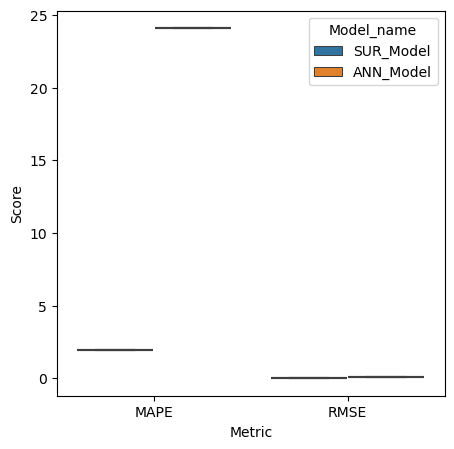

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[5,5]
sns.boxplot(data=report_df1,x=report_df1.Metric,y=report_df1.Score,hue='Model_name')

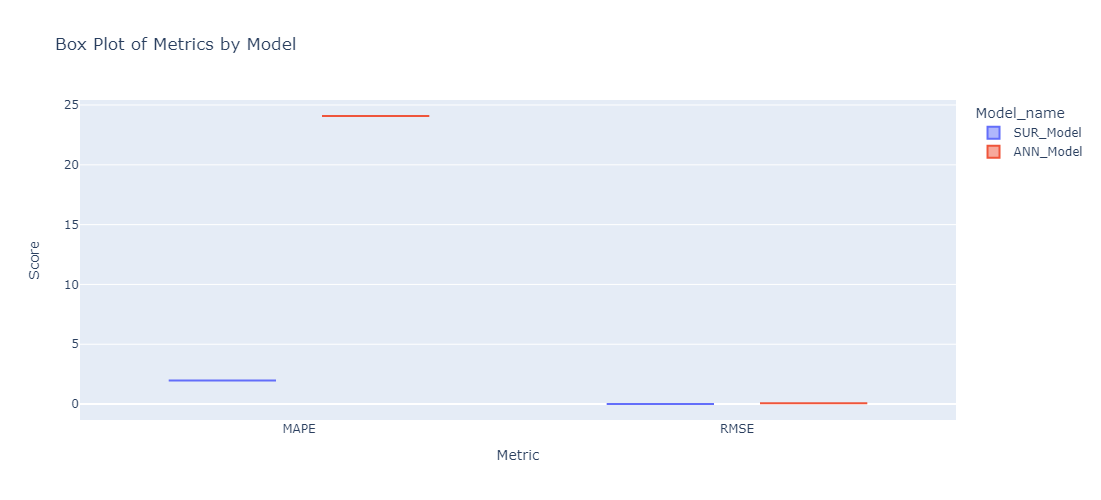

In [ ]:
import plotly.express as px
import pandas as pd
# Create the box plot using Plotly
fig = px.box(report_df1, x='Metric', y='Score', color='Model_name', title='Box Plot of Metrics by Model')

# Update layout if needed (e.g., to adjust the size)
fig.update_layout(
    autosize=False,
    width=500,
    height=500
)

# Show the plot
fig.show()